# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [1]:
A = read.csv("anes_pilot_2018.csv")

In [2]:
summary(A)

                                       ï..version       caseid      
 ANES 2018 Pilot Study main version 20190129:2500   Min.   :   1.0  
                                                    1st Qu.: 669.8  
                                                    Median :1389.5  
                                                    Mean   :1390.4  
                                                    3rd Qu.:2112.2  
                                                    Max.   :2779.0  
                                                                    
     weight         weight_spss           form           follow     
 Min.   :0.07759   Min.   :0.04503   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.52794   1st Qu.:0.30642   1st Qu.:1.000   1st Qu.:1.000  
 Median :0.74272   Median :0.43107   Median :1.000   Median :1.000  
 Mean   :1.00000   Mean   :0.58040   Mean   :1.497   Mean   :1.722  
 3rd Qu.:1.18583   3rd Qu.:0.68825   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :7.00780   Max.   :4.06733

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 5000 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```


## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

Survey used `feeling thermometer` wigit to understand how the respondents **feel** about some persons or groups (which include both journalists and police). Respondents need to answer on an ordinal scale with a number between 0 and 100. This setting, although, gives a good idea about how favorable or unfavorable the respondant feels about blacks and police, it is only a rough proxy for **respect**. 

**Operational Definition**:We are going to use the respondent's feeling about the police and journalists (from columns `ftpolice` and `ftjournal`) as a proxy for the respect they have for these groups.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [27]:
# Basic variable summary
sub = A[c('ftjournal', 'ftpolice')]
summary(sub)
paste("Number of rows in the original data: ", nrow(sub))

# Visualizing data ros where no responses were provided
print("Non-responding entries")
(sub[sub['ftjournal'] < 0,])

   ftjournal         ftpolice     
 Min.   : -7.00   Min.   :  0.00  
 1st Qu.: 21.00   1st Qu.: 47.00  
 Median : 52.00   Median : 70.00  
 Mean   : 52.26   Mean   : 64.68  
 3rd Qu.: 82.00   3rd Qu.: 90.00  
 Max.   :100.00   Max.   :100.00  

[1] "Number of rows in the original data:  2500"

[1] "Non-responding entries"


,ftjournal,ftpolice
51,-7,84
597,-7,91


   ftjournal         ftpolice     
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 21.00   1st Qu.: 47.00  
 Median : 52.00   Median : 70.00  
 Mean   : 52.31   Mean   : 64.67  
 3rd Qu.: 82.00   3rd Qu.: 90.00  
 Max.   :100.00   Max.   :100.00  

[1] "Number of rows in the transformed data:  2498"

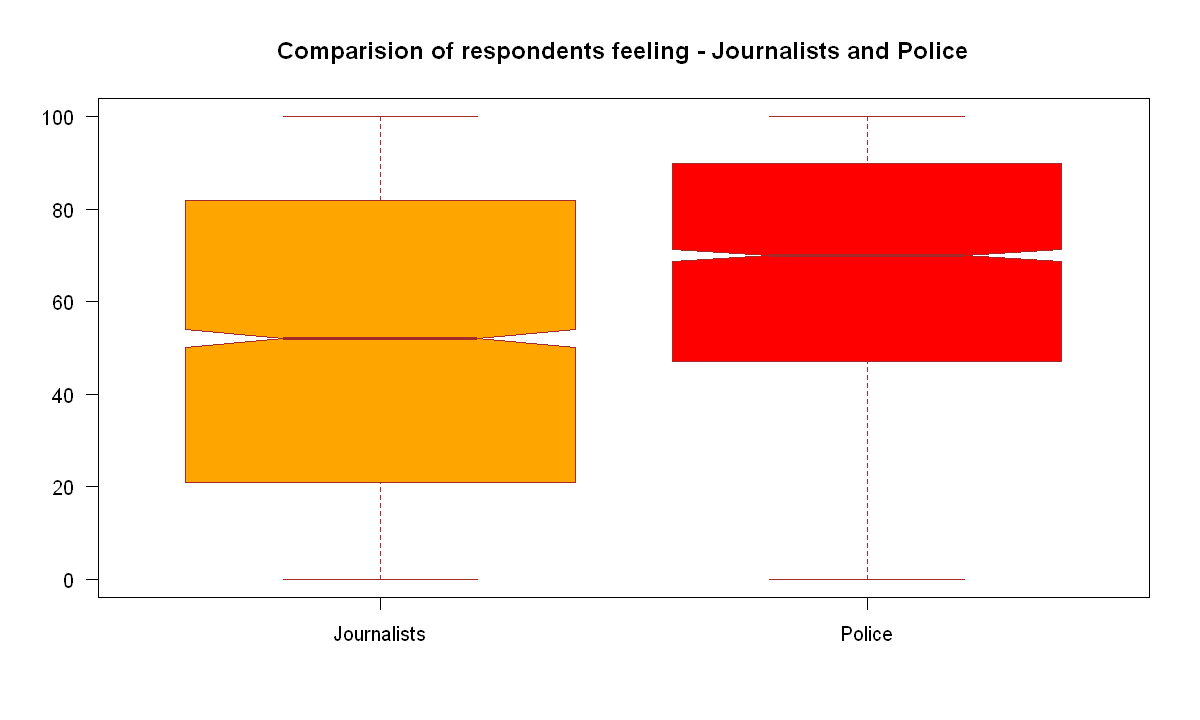

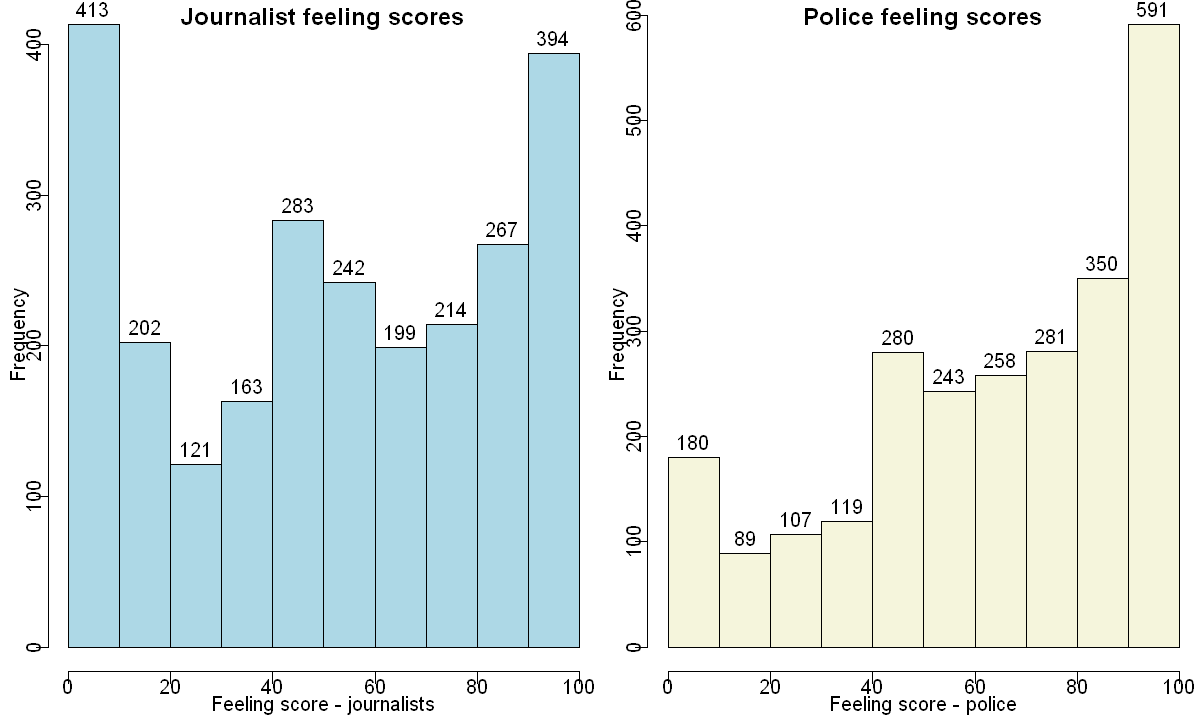

In [28]:
# Treating for no-response by removing those respondents
sub = sub[sub['ftjournal']>=0,]
summary(sub)
paste("Number of rows in the transformed data: ", nrow(sub))

# Single variable analysis (Box-plots)
options(repr.plot.height=6, repr.plot.width = 10)
boxplot(sub$ftjournal, sub$ftpolice, main = "Comparision of respondents feeling - Journalists and Police", at = c(1,2),
        names = c("Journalists", "Police"), las = 1, col = c("orange","red"), border = "brown", horizontal = F,
        notch = TRUE)
par(mfrow=c(1,2), mar=c(2,2,0,0), mgp=c(.8,.1,0))
x <- hist(sub$ftjournal, main='', col='lightblue', xlab = "Feeling score - journalists")
text(x$mids,x$counts,labels=x$counts, adj=c(0.5, -0.5))
title('Journalist feeling scores', line=-1, adj=0.5)
Y <- hist(sub$ftpolice, main='', col='beige', xlab = "Feeling score - police")
text(Y$mids,Y$counts,labels=Y$counts, adj=c(0.5, -0.5))
title('Police feeling scores', line=-1, adj=0.5)

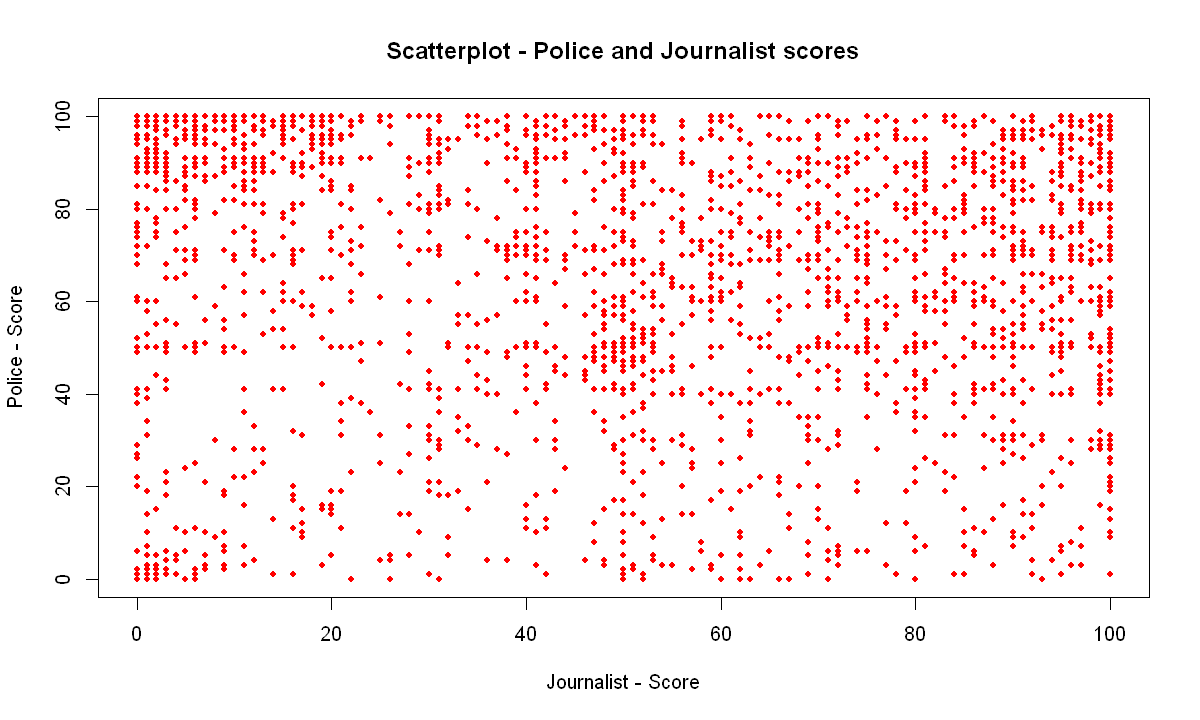

In [5]:
plot(sub$ftjournal, sub$ftpolice, main="Scatterplot - Police and Journalist scores",
     xlab="Journalist - Score", ylab="Police - Score", pch=20, col='red')

### Basic EDA summary

1. All the respondents provided their feelings about `police` but 2 of them didn't provide an answer about `journalists`. We suggest removing them from the consideration set as we are going to do paired hypothesis test where it will be important to have legitimate responses for both Police and Journalists.
2. All the provided answers are in the range of 0 to 100 which makes sense
3. Looking at single variable summary, we see that
    1. The range of scores is higher for Journalists than Police. The median score is higher for police than journalists (Refer Box-plot)
    2. Journalist score are more concentrated on both extremes where are police score is concentrated on the high end. The distribution in the middle is pretty much the same for both classes
4. The Scatterplot shows that individual scores for feeling towards police and journalists are not correlated. At every journalist score bucket, there seem to be a bias towards higher police score which might suggest that poeple feel better towards journalists than police in the sample, but we need to perform a hypothesis test to test this hypothesis. 

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

There are a few considerations that we will take into account:

1. The feeling score is an **ordinal variable** (not a metric variable). A score of 20 is bettern than a score of 10 for example but it might not be correct to interpret that the difference in feeling towards any group is same when between a response of 10 and 20, 45 and 55 and 90 and 100. In this regard, the difference between these variable have limited meaning. 

2. Every respondent in the sample (excluding 2 whcih didn't respondt to poilce question) have a pair of feeling scores for police and journalists. As per our operational definition, this score is our proxy for respect and we can do a paired hypothesis test to test any hypothesis we form. 

3. We assume that each row of data (i.e. respondent) is independent. This may be a strong assumption given the fact that all of the selected respondents share a common trait (completing most number of survey's as per YouGov panel). It is possible that data rows might be dependent owing to  multiple factors (e.g. presence of multiple family members in the dataset etc.)

4. Sampling is not exactly representative of US voting population. This has been discussed and the authors have tried to compensate for it using weights. We are however assuming that the weight for each participant is 1 (i.e. the sample is representative of the US voting population) for our hypothesis testing exercise below.

The question asks US voters ahve more respect for which group (Police or Journalists). As We don't have an strong opinion to support any one of the groups, we will start with the two-sided hypothesis. If we find that there is actually a stat-sig difference in respect across the two groups, we can test one sided hypothesis to test which one. Below we state the two-sided hypothesis.

### Two sided Hypothesis

$H_0$: There is no difference in respect between police and journalists among US voters.

$H_A$: There is a difference in respect between police and journalists among US voters.

### Appropriate test

Given that we want to to paired test and the variables are Ordinal in nature, We wil use **sign test** for hypothesis testing. This test has lower power which means there is a higher chance of not being able to detect the effect. The key assumptions are:
1. Differences in Police and Journalist ratings across respondents is independent. This seems to be correct (however, there might be cases where due to sampling bias, some respondent rating are dependent but for the most part we are assuming that's not the case) 
2. The ratings for police and journalists are ordinal (which is obviously true)
3. All the differences are sampled from the same population (which is what we are assuming to be true)

### Significance Level

We want to perform the test at **99% significance level** which means the expected type 1 error rate to be 1%.  

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [29]:
# REMOVING ALL THE ROWS OF DATA WHERE THERE IS A TIE BETWEEN THE TWO SCORES
sub1 <- sub[(sub$ftpolice != sub$ftjournal), ] 

In [30]:
# RUNNING THE BINOMIAL TEST
binom.test(sum((sub1$ftpolice - sub1$ftjournal)> 0), nrow(sub), p=0.5, alternative = "two.sided", conf.level = 0.99)


	Exact binomial test

data:  sum((sub1$ftpolice - sub1$ftjournal) > 0) and nrow(sub)
number of successes = 1373, number of trials = 2498, p-value =
7.581e-07
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.5237227 0.5753658
sample estimates:
probability of success 
             0.5496397 


In [31]:
# CALCULATING MEDIAN SCORE DIFFERENCE IN TE ORIGINAL DATA
median(sub$ftpolice - sub$ftjournal)

[1] 4

To conduct the sign test, we can do the following:

1. Remove all the rows of data where the score for police and journalists is a tie
2. For remaining dataset, define the cases where police score is higher than journalists as 1 and otherwith 0. This way we create a binary vector where we can run a binomial test to check if the proportion mean is 0.5

We have the following observations:

1. The total sample size is 2417. Out of that, there are 1373 respondents who gave higher score to Police than Jourlalists. 
2. The p-value for this test (at 99% significance level) is $2.361 * 10^{-11}$. which is way smaller than our target significance level (of 0.01). Hence, we have statistically significant evidence to reject the Null hypothesis that the US voters repect police and journalists the same. 
3. The 99 percent confidence interval for the median difference in Score for proportion of people favoring police over journalists is [0.5418, 0.5941]. We can see that this number doesn't contain 0.5 which was our null hypothesis.
4. The sample median for the difference between police and journalist median scores is 4

As mentioned before, at this point, we can perform a one-sided hypothesis test to see if the US voter prefer police over journalists.

### One sided Hypothesis

$H1_0$: There is no difference in respect between police and journalists among US voters.

$H1_A$: US voters respect Police more than Journalists.

In [34]:
binom.test(sum((sub1$ftpolice - sub1$ftjournal)> 0), nrow(sub1), p=0.5, alternative = "greater", conf.level = 0.99)


	Exact binomial test

data:  sum((sub1$ftpolice - sub1$ftjournal) > 0) and nrow(sub1)
number of successes = 1373, number of trials = 2417, p-value = 1.18e-11
alternative hypothesis: true probability of success is greater than 0.5
99 percent confidence interval:
 0.5443169 1.0000000
sample estimates:
probability of success 
             0.5680596 


From the above one sample result, we can conclude that at 99% confidence level, we can reject the null hypothesis $H1_0$in favor of the alternative hypothesis $H1_A$. 

### Effect size
A measure of difference can be the median difference in the sample between police and journalist score whcih is 4. 

### Practical significance and Discussion

Although we got a highly statistically significant result, the effect size seems to be small (4 point difference) and it is rather hard to interpret this difference as the feeling score is not a metric. Our research question was specifically about respect rather than likeness hence there is an assymetry between out research question and the actual question.

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Operational definition

This is an interesting analysis and we have to set-up a careful setting in 

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

**Climate change** is a politically charged issue, one of the most politically dividing in the context of US politics. On the party lines, Democrats and Republicans have very different opinions about this issue. As this is a global issue of significance, it is important to note the voter sentiment around it. In politics, nothing is permanent and if enough voter sentiment changes around the subject (one way or the other) we can expect party leadership to change the tune on this matter. 

In this regard, we expect the liberal-conservative bias to show up in the public opinion. We want to go one step further and see if we can come up with something more interesting. 


### Political question

The key question we want to answer is that between the Democrat and Republican voters, what is the difference between the population with extreme opinion about climate change? `Extreme` is a loaded word and we define it differently based on the cohort. The intuition behind this question is that if a large proportion of voters are on a extreme on some policy position, there is less motivation for the political parties to difer from that extreme. On the other hand, if the voting pupulation is diffused (and not concentrated on one of the extremes) then there is incentive for political parties to change their positions in order to compete for the swing vote. 

In this regard, the positions where the voting population is not on the extremes become more important politically as these become the grounds for getting the swing votes. 


### Design

There are five choices for the question `How important is the issue of climate change to you personally? `. We define the following encoding for Democrat and republican voters:

|Answer Option|Democrat encoding|Republican Encoding|
|--|--|--|
|Not at all important (1)|0|1|
|A little important (2)|0|0|
|Moderately important (3)|0|0|
|Very important (4)|0|0|
|Extremely important (5)|1|0|

Via this encoding, we are trying to understand that within each voting cohort (D and R), what is the proportion of extreme response. 

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Step 1: Extracting Democrat and Republican tagging

We first need to understand who are Republicans and Democrats. For this we will use the combination of `pid1r` and `pid1d` columns. We will only consider the rows where each of these column values are either 1 or 2 (with 1 being democrat and 2 being republican). We will disregard all other values. 

**CAUTION**: In this way, we are disregarding every respondent who has declined to answer this question, independent and supports other party. The last are ok because we explicitely are interested in Democrat and Republican split but the first is concerning as this means we might be missing some undecided candidate. (Analysis show that we wil be disregarding only 2 people thsi was so that is ok)

In [231]:
party <- A[,c('pid1d', 'pid1r','warmyou')]

In [232]:
# Respondents that declined to answer the party affliation question
party[(party$pid1d == -7)|(party$pid1r == -7),]
party <- party[!((party$pid1d == -7)|(party$pid1r == -7)),]

,pid1d,pid1r,warmyou
497,-1,-7,5
596,-7,-1,1


In [233]:
summary(party)

     pid1d             pid1r            warmyou     
 Min.   :-1.0000   Min.   :-1.0000   Min.   :1.000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:2.000  
 Median :-1.0000   Median :-1.0000   Median :3.000  
 Mean   : 0.4155   Mean   : 0.4644   Mean   :3.142  
 3rd Qu.: 2.0000   3rd Qu.: 2.0000   3rd Qu.:4.000  
 Max.   : 4.0000   Max.   : 4.0000   Max.   :5.000  

In [234]:
party$party <- ifelse(party$pid1d == 2 | party$pid1r == 2, 'REPUBLICAN', ifelse(party$pid1d == 1 | party$pid1r == 1, 
                                                                                'DEMOCRAT', 'O'))
party <- party[party$party != 'O',]

### Step 2: Encoding the Global warming attitude

As per our discussion above, both democrat and republicans have different conotations for extreme. Following the schema discussed above, we will transfrom the `warmyou` variable into a binary vector. 

In [235]:
# tagging the extreme results appropriately in line with the party lines

party$extreme_opinion <- ifelse((party$party == 'REPUBLICAN')&(party$warmyou==1), 
                                1, ifelse((party$party == 'DEMOCRAT')&(party$warmyou==5), 1, 0))

### Step 3: Vsualization of variables

[1] "The distribution across classes"


            
               0   1
  DEMOCRAT   518 339
  REPUBLICAN 332 277

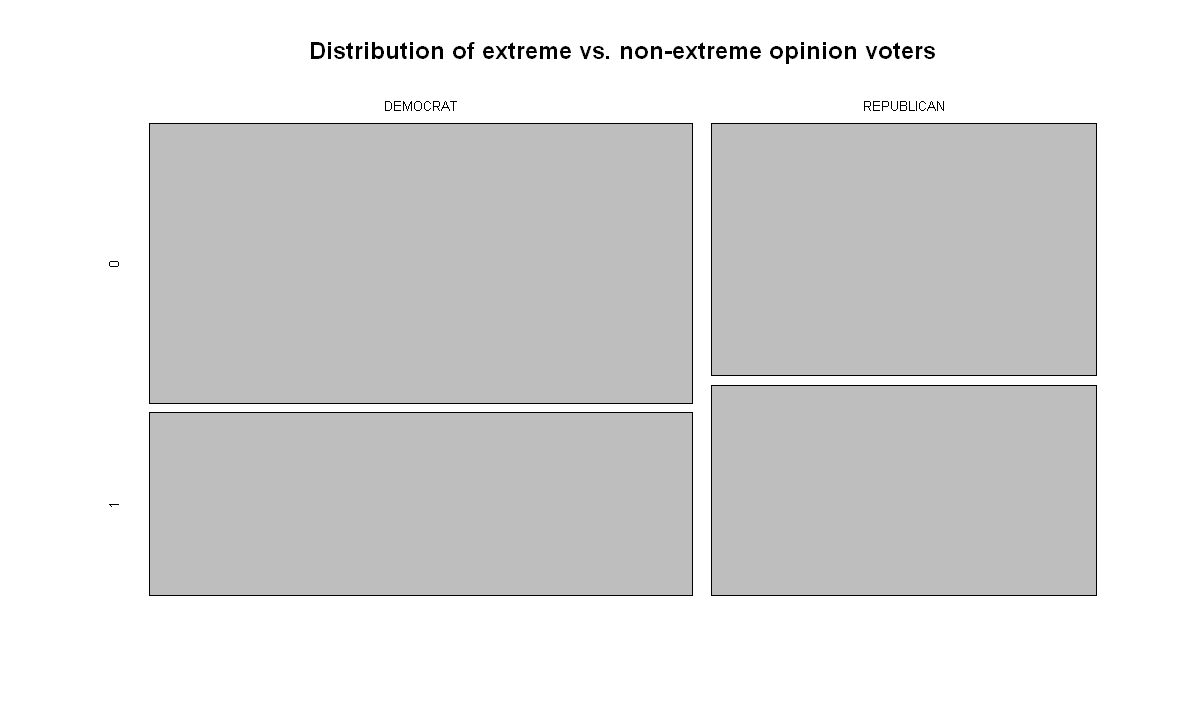

In [236]:
print('The distribution across classes')
table(party$party, party$extreme_opinion)

plot(table(party$party, party$extreme_opinion), main = 'Distribution of extreme vs. non-extreme opinion voters')

### Hypothesis - Two sided

$H_0$: Proportion of extreme responses between democrat and republican voters is the same

$H_A$: Proportion of extreme responses between democrat and republican voters is NOT the same

### Significance level 

We want to perfrom the test at 95% significance level (i.e. Expected FPR of 5%) 

### Appropriate test

**2-proportion z-test** seems to be appropriate for this case. The key conditions for this test are:

1. We have a simple random sample - This condition is not met exactly but for all the analysis before this section we are assuming this to be true. Hence we can assume this condition to be met here as well

2. Independent sample - Sample should be independent. As mentioned in previous analysis, thsi might be a strong assumption but we are anyways considering it to be true

3. Sample size restrictions - Each sample has > 10 respondents and population is atleast 20 times bigger than the sample

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

In [240]:
prop.test(x = c(sum(party[(party$party == 'DEMOCRAT')&(party$extreme_opinion==1), 'extreme_opinion']), 
                sum(party[(party$party == 'REPUBLICAN')&(party$extreme_opinion==1), 'extreme_opinion'])),
          n=c(nrow(party[party$party == 'DEMOCRAT', ]), nrow(party[party$party == 'REPUBLICAN', ])),
          conf.level = 0.95,alternative = 'two.sided', correct=F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(party[(party$party == "DEMOCRAT") & (party$extreme_opinion ==  out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party ==     1), "extreme_opinion"]), sum(party[(party$party == "REPUBLICAN") &  out of     "REPUBLICAN", ]))    (party$extreme_opinion == 1), "extreme_opinion"])) out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party == 
X-squared = 5.1348, df = 1, p-value = 0.02345
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11061828 -0.00793788
sample estimates:
   prop 1    prop 2 
0.3955659 0.4548440 


We tested the two sided hypothesis that the proportion of extreme opinion voters in Demotratic and Republican party are same.  Against the alternate hypothesis that they are different. From the 2-sample z-test we see that 

1. The p-value is 0.02345
2. 95% confidence interval for the difference in proportions is [-0.1106, -0.0079] (which doesn't contains 0

At 95% confidence level, we have sufficient evidence coming from the data to **reject the Null Hypothesis**. 

### One sided Hypothesis test

We can now test the hypothesis that among Republican voters, prevelance of extreme opinion is higher than among Democrat voters. 

### Hypothesis - One sided

$H_0$: Proportion of extreme responses between democrat and republican voters is the same

$H_A$: Proportion of extreme responses among democrat voters is less than republican voters


In [243]:
prop.test(x = c(sum(party[(party$party == 'DEMOCRAT')&(party$extreme_opinion==1), 'extreme_opinion']), 
                sum(party[(party$party == 'REPUBLICAN')&(party$extreme_opinion==1), 'extreme_opinion'])),
          n=c(nrow(party[party$party == 'DEMOCRAT', ]), nrow(party[party$party == 'REPUBLICAN', ])),
          conf.level = 0.95,alternative = 'less', correct=F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(party[(party$party == "DEMOCRAT") & (party$extreme_opinion ==  out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party ==     1), "extreme_opinion"]), sum(party[(party$party == "REPUBLICAN") &  out of     "REPUBLICAN", ]))    (party$extreme_opinion == 1), "extreme_opinion"])) out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party == 
X-squared = 5.1348, df = 1, p-value = 0.01173
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.01619203
sample estimates:
   prop 1    prop 2 
0.3955659 0.4548440 


At 95% confidence level, we have sufficient evidence to reject the null hypothesis in favor of one sided alternative hypothesis. 

### Effect size

The difference of proportion (which stands at -0.0592) in the sample between democrat voters with extreme opinions and republicans can be a good proxy for the effect size. Converting this to percentages, thsi says that the affinity to extreme with respect to climate change is ~6% higher among republican voters than democrat voters. This is a sizable effect. 

### Conclusion

We tried to underatnd the opinions of US voters vis-a-vis party opinions along the topic of climate change. What we see is that a huge proportion of voters on both sides cling to the extremes (democrats to the importance of this topic and Republicans to the unimportance). Yet we see that there is a **sizable, statistically significant difference** between the extreme opinion voters across the party lines. 

There are significantly more extreme opinion holding voters on republican side than democrat (~ 6%). In the long run, this analysis give rise to the idea that atleast in the short run, there is less chance for Republican party line to change its narrative around Climate change (in absence of public support).

More work need to be done to understand this further in terms of respondant age and other demographic factors.